# Laboratorio 4 - Clustering

## Mineria de datos - Seccion 20

### Grupo 4: Andrés de la Roca y Jun Woo Lee

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
sns.set()
from sklearn.cluster import KMeans

In [164]:
data = pd.read_csv('iris.csv')
data_con_respuestas = pd.read_csv('iris-con-respuestas.csv')

In [165]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Seccion 1 - Forma de sepalo

#### 1. Visualizacion de los datos

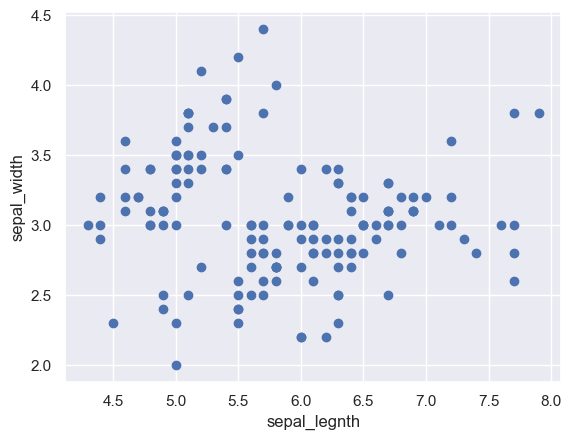

In [166]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('sepal_legnth')
plt.ylabel('sepal_width')
plt.show()  


A simple vista se pueden detectar 2 grupos, sin embargo, se conoce que hay 3 tipos de flor, se continuara con los demas pasos para ver como esto tiene una influencia sobre el resultado.

In [167]:
x = data.filter(['sepal_length','sepal_width'])
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


#### 2. Creacion de clustering y grafico

In [168]:
kmeans = KMeans(2) 

kmeans.fit(x) # Ajuste del modelo con los datos de x (forma de sepalo)

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [169]:
clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

clusters_identificados

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [170]:
datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [171]:
# Graficacion segun los clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'Cluster',
                )
fig.show()


#### 3. Estandarizacion de los datos (Repeticion de paso 2)

In [172]:
data = (data - data.mean()) / data.std() # Estandarizacion de los datos

In [173]:
x = data.filter(['sepal_length','sepal_width'])

kmeans = KMeans(2) 

kmeans.fit(x) # Ajuste del modelo con los datos de x (forma de sepalo)


c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [174]:
clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

clusters_identificados

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [175]:
datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.018437,1.259242,-1.336794,-1.308593,0
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,1
146,0.551486,-1.277692,0.703536,0.918985,1
147,0.793012,-0.124540,0.816888,1.050019,1
148,0.430722,0.797981,0.930239,1.443121,1


In [176]:
# Graficacion segun los clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'Cluster',
                )
fig.show()

En este resultado se puede observar como los clusters cambiaron de forma a comparacion de cuando se grafico con datos no estandarizados, en este caso el cluster 0 cubre la mayor cantidad de datos del set, por otro lado, el cluster 1 reduce su tamaño a cubrir una fraccion de la cantidad de datos que cubria con los datos no estandarizados. Se considera que este cluster representa mas fielmente la division de los clusters que deberia de tener este data set si se fueran a tomar en cuenta solo 2 grupos de datos.

#### 4. Utilizar el metodo del "codo"

Se buscara el punto en el que la disminucion de inercia sea lo mas significativa posible, ya que de esta manera encontraremos el numero optimo de clusters para estos datos.

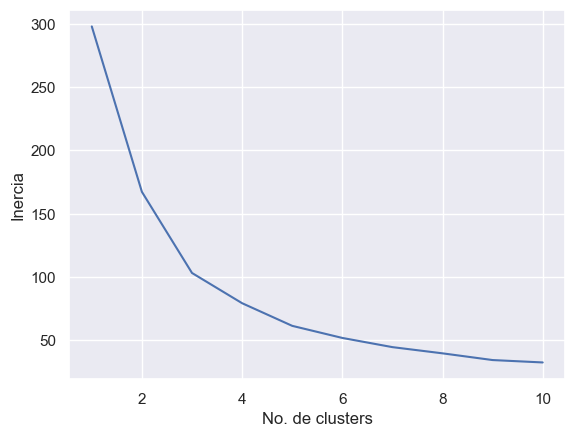

In [177]:
# Metodo del codo
inertia = []
for k in range(1,11): # De 1 a 10
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) 

# Grafico de inercia segun el numero de clusters
plt.plot(range(1,11), inertia)
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.show()

Segun lo que se puede observar en la grafica y siguiendo la interpretacion que el metodo del "codo" busca conseguir acerca del punto de inflexion de esta curva se podria decir que la cantidad optima de clusters se encuentra entre 2 y 4 clusters en total, ya que estos son los clusters que mayor disminucion en los valores de inercia tienen. Con el objetivo de comprobar concretamente cual es la cantidad que nos podria dar resultados mas fiables se realizaran graficas con el numero de cluster en el siguiente inciso.

#### 5. Realizar graficas con el numero de clusters que mejor se ajusten

In [178]:
# 2 clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'Cluster',
                )
fig.show()

In [179]:
# 3 clusters

kmeans = KMeans(3)

kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'Cluster',
                )
fig.show()

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [180]:
# 4 clusters

kmeans = KMeans(4)

kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'Cluster',
                )
fig.show()

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### 6. Comparar soluciones con los datos reales

In [181]:
# Datos reales

fig = px.scatter(data_con_respuestas,
                 x = 'sepal_length',
                 y = 'sepal_width',
                 color = 'species',
                 hover_data=['species']
                 )

fig.show()

Segun la divison de especies que tienen los datos reales se podria decir que el numero de clusters optimo para representar este dataset son 3 clusters, la division de los clusters como se muestra en la grafica de los 3 clusters es muy similar a como los datos reales son representados en esta grafica. Ahora lo unico que queda es determinar que tan preciso es el analisis de cluster con el uso de 3 clusters.

In [182]:
from sklearn.metrics import precision_score

kmeans = KMeans(n_init = 'auto', n_clusters=3, random_state=0)
clusters_identificados = kmeans.fit_predict(x)

datos_con_clusters = data.copy()

datos_con_clusters['cluster'] = clusters_identificados
datos_con_clusters['cluster'] = datos_con_clusters["cluster"].astype("category")

'''
Se toma como que la equivalencia de clusters y especies es la siguiente:
No. cluster - Nombre de especie
0 - setosa
1 - versicolor
2 - virginica
'''
clusters_con_nombre = []
for numero_cluster in datos_con_clusters['cluster']:
    if numero_cluster == 0:
        clusters_con_nombre.append('setosa')
    elif numero_cluster == 1:
        clusters_con_nombre.append('versicolor')
    elif numero_cluster == 2:
        clusters_con_nombre.append('virginica')

datos_con_clusters['cluster'] = clusters_con_nombre
datos_con_clusters['cluster'] = datos_con_clusters['cluster'].astype('category')


# Calculo de precision
precision = precision_score(data_con_respuestas['species'], datos_con_clusters['cluster'], average=None)

cluster_count = 0
for porcentaje in precision:
    print(f'La precision del cluster {cluster_count} es de {porcentaje}')
    cluster_count += 1

print(f"Lo cual nos da una media de precision de: {np.sum(precision) / precision.size}")

La precision del cluster 0 es de 0.98
La precision del cluster 1 es de 0.6730769230769231
La precision del cluster 2 es de 0.7083333333333334
Lo cual nos da una media de precision de: 0.7871367521367522


#### ¿Funcionó el clustering con la forma del sépalo?

Este analisis y comparacion con los resultados reales nos deja observar que la precision del analisis de clusters utilizada sobre el dataset con relacion a las dimensiones del sepalo es decentemente preciso con un 78.7% de precision. Donde mas le resulto dificil predecir los resultados a este analisis fue en donde habian datos atipicos o datos con valores muy similares a los pertenecientes a los otros clusters existentes. Por lo que se podria decir que este clustering si funciono, ya que varios de los datos mostrados se apegan a los datos reales encontrados, ahora solo falta el analisis de la forma de petalo para observar si esas variables pueden ayudar a llegar a un modelo de analisis por clustering mas preciso.

### Seccion 2 - Forma de petalo

In [183]:
data = pd.read_csv('iris.csv')
data_con_respuestas = pd.read_csv('iris-con-respuestas.csv')

#### 1. Visualizacion de los datos

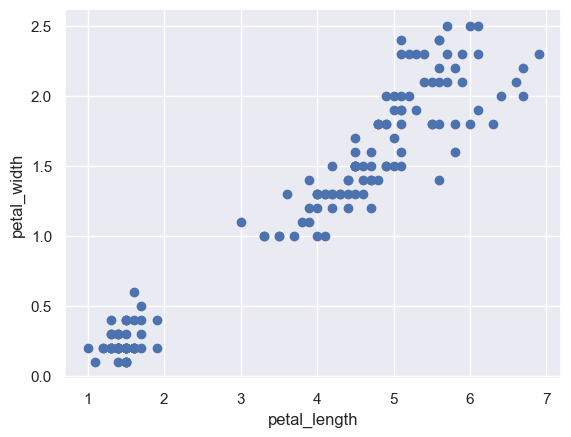

In [184]:
plt.scatter(data['petal_length'], data['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()  

A simple vista se pueden detectar 2 grupos, con alta diferencia entre si, pero ya que se conoce que hay 3 tipos de flores, se continuara con los demas pasos para ver como esto tiene una influencia sobre el resultado.

In [185]:
x = data.filter(['petal_length','petal_width'])
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#### 2. Creacion de clustering y grafico

In [186]:
kmeans = KMeans(2) 

kmeans.fit(x) # Ajuste del modelo con los datos de x (forma de sepalo)

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [187]:
clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

clusters_identificados

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [188]:
datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [189]:
# Graficacion segun los clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'Cluster',
                )
fig.show()

#### 3. Estandarizacion de los datos (Repeticion de paso 2)

In [190]:
data = (data - data.mean()) / data.std() # Estandarizacion de los datos

In [191]:
x = data.filter(['petal_length','petal_width'])

kmeans = KMeans(2) 

kmeans.fit(x) # Ajuste del modelo con los datos de x (forma de sepalo)

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [192]:
clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

clusters_identificados

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [193]:
datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.897674,1.028611,-1.336794,-1.308593,1
1,-1.139200,-0.124540,-1.336794,-1.308593,1
2,-1.380727,0.336720,-1.393470,-1.308593,1
3,-1.501490,0.106090,-1.280118,-1.308593,1
4,-1.018437,1.259242,-1.336794,-1.308593,1
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,0
146,0.551486,-1.277692,0.703536,0.918985,0
147,0.793012,-0.124540,0.816888,1.050019,0
148,0.430722,0.797981,0.930239,1.443121,0


In [194]:
# Graficacion segun los clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'Cluster',
                )
fig.show()

En este resultado se puede observar como los clusters no tuvieron ningun tipo de cambio cuando se utilizaron datos no estandarizados y estandarizados. Esto podria ser debido a que en el cluster 0 y 1 hay una gran diferencia entre los dos. Por lo que se puede ver que con la forma de petalos, no hay diferencia en si se estandarizan o no los datos.

#### 4. Utilizar el metodo del "codo"

Se buscara el punto en el que la disminucion de inercia sea lo mas significativa posible, ya que de esta manera encontraremos el numero optimo de clusters para estos datos.

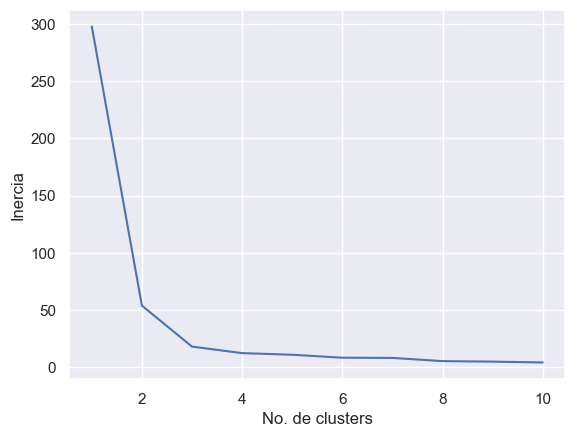

In [195]:
# Metodo del codo
inertia = []
for k in range(1,11): # De 1 a 10
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) 

# Grafico de inercia segun el numero de clusters
plt.plot(range(1,11), inertia)
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.show()

Segun lo que se puede observar en la grafica y siguiendo la interpretacion que el metodo del "codo" busca conseguir acerca del punto de inflexion de esta curva se podria decir que la cantidad optima de clusters se encuentra entre 2 y 4 clusters en total, ya que estos son los clusters que mayor disminucion en los valores de inercia tienen. Con el objetivo de comprobar concretamente cual es la cantidad que nos podria dar resultados mas fiables se realizaran graficas con el numero de cluster en el siguiente inciso.

#### 5. Realizar graficas con el numero de clusters que mejor se ajusten

In [196]:
# 2 clusters

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'Cluster',
                )
fig.show()

In [197]:
# 3 clusters

kmeans = KMeans(3)

kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'Cluster',
                )
fig.show()

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [198]:
# 4 clusters

kmeans = KMeans(4)

kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x) # Prediccion de clusters segun el modelo

datos_con_clusters = data.copy()

# Variable que nos ayudara a observar que cluster se le ha identificado a cada dato
datos_con_clusters['Cluster'] = clusters_identificados

datos_con_clusters['Cluster'] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'Cluster',
                )
fig.show()

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### 6. Comparar soluciones con los datos reales

In [199]:
# Datos reales

fig = px.scatter(data_con_respuestas,
                 x = 'petal_length',
                 y = 'petal_width',
                 color = 'species',
                 hover_data=['species']
                 )

fig.show()

Segun la divison de especies que tienen los datos reales se podria decir que el numero de clusters optimo para representar este dataset son 3 clusters, la division de los clusters como se muestra en la grafica de los 3 clusters es muy similar a como los datos reales son representados en esta grafica. Ahora lo unico que queda es determinar que tan preciso es el analisis de cluster con el uso de 3 clusters.

In [200]:
from sklearn.metrics import precision_score


data = (data - data.mean()) / data.std() # Estandarizacion de los datos
x = data.filter(['petal_length','petal_width'])


kmeans = KMeans(n_init = 'auto', n_clusters=3, random_state=0)
clusters_identificados = kmeans.fit_predict(x)

datos_con_clusters = data.copy()

datos_con_clusters['cluster'] = clusters_identificados
datos_con_clusters['cluster'] = datos_con_clusters["cluster"].astype("category")

'''
Se toma como que la equivalencia de clusters y especies es la siguiente:
No. cluster - Nombre de especie
0 - setosa
1 - versicolor
2 - virginica
'''
clusters_con_nombre = []
for numero_cluster in datos_con_clusters['cluster']:
    if numero_cluster == 0:
        clusters_con_nombre.append('setosa')
    elif numero_cluster == 1:
        clusters_con_nombre.append('versicolor')
    elif numero_cluster == 2:
        clusters_con_nombre.append('virginica')

datos_con_clusters['cluster'] = clusters_con_nombre
datos_con_clusters['cluster'] = datos_con_clusters['cluster'].astype('category')


# Calculo de precision
precision = precision_score(data_con_respuestas['species'], datos_con_clusters['cluster'], average=None)

cluster_count = 0
for porcentaje in precision:
    print(f'La precision del cluster {cluster_count} es de {porcentaje}')
    cluster_count += 1

print(f"Lo cual nos da una media de precision de: {np.sum(precision) / precision.size}")

La precision del cluster 0 es de 1.0
La precision del cluster 1 es de 0.041666666666666664
La precision del cluster 2 es de 0.07692307692307693
Lo cual nos da una media de precision de: 0.37286324786324787


#### ¿Funcionó el clustering con la forma del petalo?

Este analisis y comparacion con los resultados reales nos deja observar que la precision del analisis de clusters utilizada sobre el dataset con relacion a las dimensiones del sepalo es no tan preciso con un 37.28% de precision. Donde se logro obtener un resultado perfecto 100% en el cluster 0 de las setosas, mientras que el de virginica se puede considerar bastante bueno debido a que es un 76%, las versicolor si encontro uun monton de dificulades con solamente un 41% de precision. Por lo que se podria decir que este clustering con forma del petalo no funciona tan bien ya que las versiclores y virginica tienen muchas similitudes en lo que confunde una gran cantidad de versicolores como virginicas.

### Seccion 3 - Kneed

In [201]:
data = pd.read_csv('iris.csv')
data_con_respuestas = pd.read_csv('iris-con-respuestas.csv')

El codo de la grafica se encuentre en k =  3


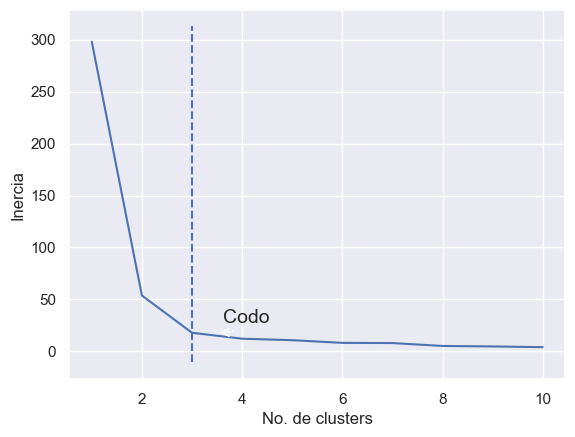

In [202]:
from kneed import KneeLocator

# Metodo del codo
inertia = []
for k in range(1,11): # De 1 a 10
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) 

# Calculo del codo
kl = KneeLocator(range(1,11), inertia, curve='convex', direction='decreasing')
print("El codo de la grafica se encuentre en k = ", kl.elbow)

# Grafico de inercia segun el numero de clusters con el codo
plt.plot(range(1,11), inertia)
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.annotate('Codo', xy=(kl.elbow+0.5, inertia[kl.elbow-1]), xytext=(4,7), textcoords='offset points', fontsize=14, arrowprops=dict(arrowstyle='->', connectionstyle='angle3'))
plt.show()




Utilizando la libreria kneed se pudo observar que el numero de clusters coincide con el elegido previamente para la seccion 1 y 2 (utilizando los valores del sepalo y petalo respectivamente), por lo que este resultado demuestra que si se esta utilizando el numero de clusters optimo para realizar el analisis. 

#### Conclusiones

Con estos resultados se puede llegar a los siguiente:

- El analisis por clusters es mas efectivo si se utiliza dentro de un contexto apropiado para el mismo, como el de este dataset, en el cual (en la mayoria de sus casos) se encuentran datos los cuales se diferencian unos de los otros y hacen ver que en realidad si son 3 grupos de resultados diferentes. Por lo cual se desempeña de mejor manera donde hay datos agrupados en grupos los cuales tienen una diferencia marcada.
- El analisis por clusters no tiende a predecir de buena manera los valores atipicos y los valores revueltos, ya que en algunos casos hay datos demasiado similares unos con los otros y terminan siendo practicamente indistuinguibles para el modelo.
- Un cambio que podria representar una posible mejora en el desempeño del modelo seria utilizar una mayor cantidad de datos para mejorar su desempeño en cuanto algunos valores atipicos y mezclados.
- Dependiendo de donde se toma los clusters, puede variar mucho los resultados. Ya que tomando la forma de sepalo se logro encontrar una precision de 78% mientras que con la forma de petalos, tuvo un desempeño malo con una precision de 37%. Donde en el de sepalos esta mas balanceado, en el de petalos se ve que una especie es predecida perfectamente, pero las otras dos encuentran dificultades.
- El clustering puede ser muy util y preciso, pero se tiene que tomar en cuenta muy bien que informacion tomar, como en este caso siendo petalos o sepalos.